In [151]:
import pandas as pd
import pickle
import json
import seaborn as sns
import pprint
import numpy as np
pp = pprint.PrettyPrinter(depth=6)
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (15.0, 5.0)
pd.set_option('display.max_columns', 120)
pd.set_option('display.max_rows', 200)

In [152]:
pkl_folder = "../../pkl"
csv_folder = "../../csv"

In [153]:
import git
git = git.Git("../../../sonarqube/") 

### Import all tag comparisons dataset

In [154]:
compare_tags = pd.read_csv(f"{csv_folder}/compare_tags_sha.csv", index_col=0)
compare_tags.head(2)

,from_tag,from_date,from_sha,to_sha,ahead_by,behind_by,to_tag,to_date
0,8.4.2.36762,2020-08-27 14:11:31,2de1f343e3dbd9e88007b42e475512677c04eb8a,a0d372f704998d38856c26e28662fd7de062f873,0,4,8.4.1.35646,2020-07-14 08:13:18
1,8.4.0.35506,2020-07-03 07:09:27,74b4533439f380827d68e8c01667eeaecad89fc7,a0d372f704998d38856c26e28662fd7de062f873,6,0,8.4.1.35646,2020-07-14 08:13:18


### Import tags

In [155]:
alltags = pd.read_csv(f"{csv_folder}/tags_updated.csv", index_col=0)
alltags.Date = pd.to_datetime(alltags.Date)
alltags["month"] = alltags.Date.dt.month
alltags["year"] = alltags.Date.dt.year
tags = alltags.tail(-1)
tags.head()

,Tag,Sha,Date,Tag_number,month,year,major_version
126,4.5.6,12d931e5a31e1692a428bbb34ba11cd63aebf998,2015-10-16 09:31:18,4.5.6,10,2015,4
125,4.5.7,e2afb0bff1b8be759789d2c1bc9348de6f519f83,2016-04-08 13:44:39,4.5.7,4,2016,4
116,5.1,4aa9af3a6a4362b61db365fba32eb0a55d411e7a,2015-04-02 08:09:45,5.1,4,2015,5
117,5.1-RC2,dfc9f94b72103ee941cc11da6529623fa91df509,2015-03-23 15:22:47,5.1,3,2015,5
115,5.1.1,0a231d24c0f1e7ce1d200274b8e9bbe00f9f49fb,2015-06-02 08:34:06,5.1.1,6,2015,5


### Filter the ones after the project started using TravisCI

In [156]:
tags = tags[tags.Date > "2015-03-10"]

In [157]:
tags.Tag.nunique()

123

### Import tag comparison pairs

In [158]:
tags_comparison = pd.read_csv(f"{csv_folder}/tags_comparison_final_updated.csv", index_col=0)
tags_comparison.from_commit_date = pd.to_datetime(tags_comparison.from_commit_date)
tags_comparison.to_commit_date = pd.to_datetime(tags_comparison.to_commit_date)
tags_comparison.from_author_date = pd.to_datetime(tags_comparison.from_author_date)
tags_comparison.to_author_date = pd.to_datetime(tags_comparison.to_author_date)
tags_comparison.head()

,from_tag,from_author_date,from_sha,to_sha,ahead_by,behind_by,to_tag,to_author_date,ahead_behind_sum,diff_author_dates,diff_author_days,from_commit_date,to_commit_date,diff_commit_dates,diff_commit_days
2307,4.5.5,2015-07-30 10:02:58,cc8a9472c671598fb3158b51b15863448a477a50,12d931e5a31e1692a428bbb34ba11cd63aebf998,16,0,4.5.6,2015-10-16 09:31:18,16,77 days 23:28:20,77.978009,2015-07-30 12:02:58,2015-10-16 11:31:18,77 days 23:28:20,77.978009
2296,4.5.6,2015-10-16 09:31:18,12d931e5a31e1692a428bbb34ba11cd63aebf998,e2afb0bff1b8be759789d2c1bc9348de6f519f83,7,0,4.5.7,2016-04-08 13:44:39,7,175 days 04:13:21,175.175938,2015-10-16 11:31:18,2016-04-08 15:44:39,175 days 04:13:21,175.175938
2257,5.1,2015-04-02 08:09:45,4aa9af3a6a4362b61db365fba32eb0a55d411e7a,0a231d24c0f1e7ce1d200274b8e9bbe00f9f49fb,7,0,5.1.1,2015-06-02 08:34:06,7,61 days 00:24:21,61.016910,2015-04-02 10:09:45,2015-06-02 10:34:06,61 days 00:24:21,61.016910
2271,5.1-RC2,2015-03-23 15:22:47,dfc9f94b72103ee941cc11da6529623fa91df509,4aa9af3a6a4362b61db365fba32eb0a55d411e7a,17,0,5.1,2015-04-02 08:09:45,17,9 days 16:46:58,9.699282,2015-03-23 16:22:47,2015-04-02 10:09:45,9 days 17:46:58,9.740949
2242,5.1.1,2015-06-02 08:34:06,0a231d24c0f1e7ce1d200274b8e9bbe00f9f49fb,2a52a7106b2bfbd659c591c2d6fc09ad0ab2db5c,12,0,5.1.2,2015-07-27 08:03:21,12,54 days 23:29:15,54.978646,2015-06-02 10:34:06,2015-07-27 10:03:21,54 days 23:29:15,54.978646


### Import issues

In [159]:
issues = pd.read_csv(f"{csv_folder}/issues.csv", index_col=0)
for date_field in ["created", "duedate", "lastViewed", "resolutiondate", "updated"]:
    issues[date_field] = pd.to_datetime(issues[date_field], errors="coerce")
issues = issues[issues.created > '2015-03-17 15:04:32+0000']
issues = issues[~(issues.edition == "Enterprise")]
issues.head()

/Library/Python/3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (4,6,9,12,13,17,19,22,41,42,43,60,61,82,84,89) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,issue_key,issue_id,issuetype,customfield_12130,customfield_11041,customfield_12132,customfield_12131,project,customfield_12134,customfield_12530,fixVersions,customfield_12133,customfield_12136,customfield_12532,resolution,customfield_10431,customfield_12135,customfield_12531,customfield_12138,customfield_10432,customfield_12534,customfield_12137,customfield_10433,customfield_12533,customfield_11832,customfield_11831,customfield_11833,resolutiondate,workratio,lastViewed,watches,created,customfield_11032,customfield_11033,priority,edition,customfield_11233,customfield_11036,customfield_11830,labels,customfield_11631,customfield_11038,customfield_10930,customfield_11347,customfield_10931,customfield_10932,versions,issuelinks,assignee,updated,status,components,customfield_12031,customfield_11140,customfield_12030,customfield_12033,customfield_11141,description,customfield_12032,customfield_12034,customfield_12430,customfield_11344,customfield_11343,customfield_10530,customfield_11345,customfield_10730,customfield_11337,customfield_11930,customfield_11139,customfield_11338,summary,creator,subtasks,customfield_11130,customfield_11131,reporter,customfield_11132,customfield_11133,customfield_10243,customfield_11335,customfield_11334,customfield_11730,customfield_10434,customfield_12536,customfield_12535,customfield_12139,environment,customfield_12538,customfield_10437,customfield_12537,customfield_10438,duedate,votes,issuetype_id,issuetype_name,priority_id,priority_name,assignee_key,assignee_name,reporter_key,reporter_name,creator_key,creator_name,status_id,status_name,resolution_id,resolution_name,votes_votes
0,SONAR-13913,97898,Task,P3-Medium,0|i0dkhb:,No root cause identified,NaN,SONAR,Not captured yet,NaN,[],Not assessed yet,Not captured yet,NaN,NaN,NaN,No action plan,NaN,Not captured yet,NaN,NaN,Not captured yet,NaN,NaN,NaN,NaN,NaN,NaT,-1,NaT,<JIRA Watchers at 5060633888>,2020-09-29 08:54:53+00:00,NaN,NaN,Major,Community,NaN,NaN,NaN,[],None,NaN,NaN,NaN,NaN,NaN,[],[],NaN,2020-09-29 08:54:53+00:00,Open,"[<JIRA Component: name='Database', id='11077'>]",NaN,NaN,NaN,NaN,NaN,- Remove org.sonar.server.platform.BackendClea...,NaN,SonarQube,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,Remove table clean up used in Integration Tests,Julien Lancelot,[],NaN,NaN,Julien Lancelot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NaN,NaN,NaN,NaN,,NaN,[],NaT,0,3,Task,3,Major,NaN,NaN,julien.lancelot,julien.lancelot,julien.lancelot,julien.lancelot,1,Open,NaN,NaN,0
1,SONAR-13912,97868,Task,P3-Medium,0|i0dkav:,No root cause identified,NaN,SONAR,Not captured yet,NaN,[],Not assessed yet,Not captured yet,NaN,NaN,NaN,No action plan,NaN,Not captured yet,NaN,NaN,Not captured yet,NaN,NaN,NaN,NaN,NaN,NaT,-1,NaT,<JIRA Watchers at 5061570768>,2020-09-28 10:14:16+00:00,NaN,NaN,Major,Community,NaN,NaN,NaN,['trello:5f71b7467b498d57987bfe0a'],None,NaN,NaN,NaN,NaN,NaN,[],[<JIRA IssueLink: id='53803'>],Malena Ebert,2020-09-28 10:18:24+00:00,Open,[],NaN,NaN,NaN,NaN,NaN,The goal of this task is to detect vulnerabili...,NaN,SonarQube,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,Add OWASP Dependency Check task to Cirrus CI,Malena Ebert,[],NaN,NaN,Malena Ebert,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NaN,NaN,NaN,NaN,,NaN,[],NaT,0,3,Task,3,Major,malena.ebert,malena.ebert,malena.ebert,malena.ebert,malena.ebert,malena.ebert,1,Open,NaN,NaN,0
2,SONAR-13910,97864,Improvement,P3-Medium,0|i0dka7:,No root cause identified,NaN,SONAR,Not captured yet,NaN,"[<JIRA Version: name='8.5', id='16342'>]",Not assessed yet,Not captured yet,NaN,NaN,NaN,No action plan,NaN,Not captured yet,NaN,NaN,Not captured yet,NaN,NaN,NaN,NaN,NaN,NaT,-1,NaT,<JIRA Watchers at 5061573984>,2020-09-28 09:56:03+00:00,NaN,NaN,Major,Developer,NaN,NaN,NaN,[],None,NaN,NaN,NaN,NaN,NaN,[],[],Julien Lancelot,2020-09-28 19:33:18+00:00,In Review,[],NaN,NaN,NaN,NaN,NaN,The changes are:\r\n * faster analysis for pro...,NaN,SonarQube,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,C/C++/Objective-C analysis updates,Evgeny Mandrikov,[],NaN,NaN,Evgeny Mandrikov,NaN,NaN,Na

In [160]:
issues.shape

(5594, 108)

### Import issue versions

In [161]:
versions = pd.read_csv(f"{csv_folder}/issues_versions.csv", index_col=0)
versions.head()

,issue_id,version_name,version_id
0,97777,8.4.2,16404
1,97773,8.4.2,16404
2,97525,8.4.2,16404
3,97521,8.4,15833
4,97347,8.4.2,16404


**Uniform versions**

In [162]:
map_versions = {"8.5.0.37579": "8.5",
               "8.4.0.35506": "8.4",
               "8.3.0.34182": "8.3",
               "8.3.1.34397": "8.3.1",
               "8.2.0.32929": "8.2",
               "8.1.0.31237": "8.1",
               "8.4.2.36762": "8.4.2",
               "8.4.1.35646": "8.4.1",
                 '6.3.0.18401':"6.3",
                 '6.3.0.18587':"6.3",
                 '6.3.0.18800':"6.3"}

In [163]:
tags["jira_version"] = tags.Tag.apply(lambda tag: map_versions[tag] if tag in map_versions else tag)

### How many issues before and after the release?

In [164]:
focus_columns = ["issue_id","version_name","version_id","issue_key","issuetype","created", "Date"]

In [165]:
v_merged = versions.merge(issues, on="issue_id")

In [166]:
vm_merged = v_merged.merge(tags, left_on="version_name", right_on="jira_version")

In [167]:
vm_merged.created = vm_merged.created.dt.tz_localize(None)
vm_merged

,issue_id,version_name,version_id,issue_key,issuetype,customfield_12130,customfield_11041,customfield_12132,customfield_12131,project,customfield_12134,customfield_12530,fixVersions,customfield_12133,customfield_12136,customfield_12532,resolution,customfield_10431,customfield_12135,customfield_12531,customfield_12138,customfield_10432,customfield_12534,customfield_12137,customfield_10433,customfield_12533,customfield_11832,customfield_11831,customfield_11833,resolutiondate,workratio,lastViewed,watches,created,customfield_11032,customfield_11033,priority,edition,customfield_11233,customfield_11036,customfield_11830,labels,customfield_11631,customfield_11038,customfield_10930,customfield_11347,customfield_10931,customfield_10932,versions,issuelinks,assignee,updated,status,components,customfield_12031,customfield_11140,customfield_12030,customfield_12033,customfield_11141,description,customfield_12032,customfield_12034,customfield_12430,customfield_11344,customfield_11343,customfield_10530,customfield_11345,customfield_10730,customfield_11337,customfield_11930,customfield_11139,customfield_11338,summary,creator,subtasks,customfield_11130,customfield_11131,reporter,customfield_11132,customfield_11133,customfield_10243,customfield_11335,customfield_11334,customfield_11730,customfield_10434,customfield_12536,customfield_12535,customfield_12139,environment,customfield_12538,customfield_10437,customfield_12537,customfield_10438,duedate,votes,issuetype_id,issuetype_name,priority_id,priority_name,assignee_key,assignee_name,reporter_key,reporter_name,creator_key,creator_name,status_id,status_name,resolution_id,resolution_name,votes_votes,Tag,Sha,Date,Tag_number,month,year,major_version,jira_version
0,97777,8.4.2,16404,SONAR-13902,Improvement,P3-Medium,0|i0djrj:,No root cause identified,NaN,SONAR,Not captured yet,NaN,[],Not assessed yet,Not captured yet,NaN,NaN,NaN,No action plan,NaN,Not captured yet,NaN,NaN,Not captured yet,NaN,NaN,NaN,NaN,NaN,NaT,-1,NaT,<JIRA Watchers at 5060450576>,2020-09-23 10:22:51,NaN,NaN,Major,Developer,NaN,NaN,NaN,[],None,NaN,NaN,NaN,NaN,NaN,"[<JIRA Version: name='8.4.2', id='16404'>]",[],NaN,2020-09-23 10:24:59+00:00,Open,"[<JIRA Component: name='Branch & PR', id='1109...",NaN,NaN,NaN,NaN,NaN,SonarQube PR decoration on Bitbucket Server so...,NaN,SonarQube,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,Improve BitBucket Server error handling,Pierre Guillot,[],NaN,NaN,Pierre Guillot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NaN,NaN,NaN,NaN,,NaN,[],NaT,1,4,Improvement,3,Major,NaN,NaN,pierre.guillot,pierre.guillot,pierre.guillot,pierre.guillot,1,Open,NaN,NaN,1,8.4.2.36762,2de1f343e3dbd9e88007b42e475512677c04eb8a,2020-08-27 14:11:31,8.4.2.36762,8,2020,8,8.4.2
1,97773,8.4.2,16404,SONAR-13900,Bug,P3-Medium,0|i0djqn:,No root cause identified,NaN,SONAR,Not captured yet,NaN,"[<JIRA Version: name='8.5', id='16342'>]",Not assessed yet,Not captured yet,NaN,Fixed,NaN,No action plan,NaN,Not captured yet,NaN,NaN,Not captured yet,NaN,NaN,NaN,NaN,NaN,2020-09-28 11:15:55+00:00,-1,NaT,<JIRA Watchers at 5060412080>,2020-09-23 09:30:41,NaN,NaN,Major,Developer,NaN,NaN,NaN,[],None,NaN,NaN,NaN,NaN,NaN,"[<JIRA Version: name='8.4.2', id='16404'>]",[],Wouter Admiraal,2020-09-28 11:15:55+00:00,Closed,"[<JIRA Component: name='Branch & PR', id='1109...",NaN,NaN,NaN,NaN,NaN,"reproducer:\r\n * On BBS create 27 projects, w...",NaN,SonarQube,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,BitBucketServer Onboarding: web ui search resu...,Pierre Guillot,[],NaN,NaN,Pierre Guillot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NaN,NaN,NaN,NaN,,NaN,[],2020-10-02 00:00:00+00:00,0,1,Bug,3,Major,wouter.admiraal,wouter.admiraal,pierre.guillot,pierre.guillot,pierre.guillot,pierre.guillot,6,Closed,1.0,Fixed,0,8.4.2.36762,2de1f343e3dbd9e88007b42e475512677c04eb8a,2020-08-27 14:11:31,8.4.2.36762,8,2020,8,8.4.2
2,97525,8.4.2,16404,SONAR-13875,New Feature,P3-Medium,0|i0di8v:,No root cause identified,NaN,SONAR,Not captured yet,NaN,"[<JIRA Version: name='8.5', id='16342'>]",Not assessed yet,Not captured 

In [168]:
(vm_merged.created > vm_merged.Date).value_counts(normalize=True)

True     0.850851
False    0.149149
dtype: float64

<AxesSubplot:ylabel='count'>

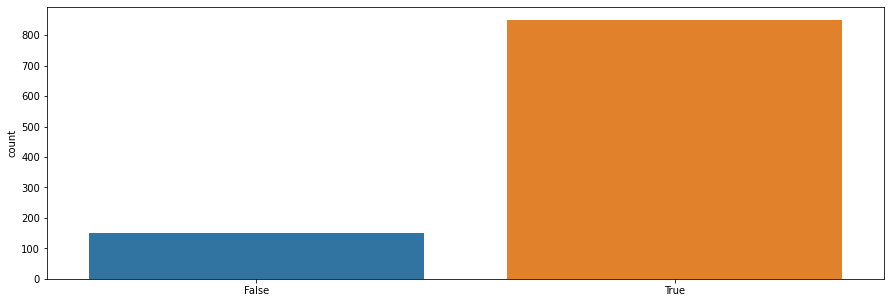

In [169]:
sns.countplot(x=vm_merged.created > vm_merged.Date)

**Post release issues**

In [170]:
post_release = vm_merged[vm_merged.created > vm_merged.Date]

In [171]:
post_release["diff_release_created_dates"] = post_release.created - post_release.Date
post_release["diff_release_created_days"] = post_release.diff_release_created_dates / np.timedelta64(1, "D")

<ipython-input-171-1fec90f35b69>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_release["diff_release_created_dates"] = post_release.created - post_release.Date
<ipython-input-171-1fec90f35b69>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_release["diff_release_created_days"] = post_release.diff_release_created_dates / np.timedelta64(1, "D")


<AxesSubplot:xlabel='diff_release_created_days'>

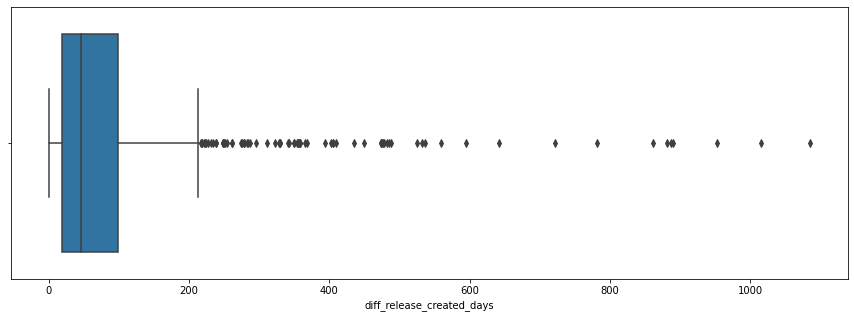

In [172]:
sns.boxplot(x=post_release.diff_release_created_days)

In [173]:
post_release.issuetype.value_counts(normalize=True)

Bug              0.900000
Improvement      0.087059
Task             0.007059
Documentation    0.004706
New Feature      0.001176
Name: issuetype, dtype: float64

**Investigate outliers**

In [174]:
post_release[post_release.diff_release_created_days >600][focus_columns]

,issue_id,version_name,version_id,issue_key,issuetype,created,Date
156,86937,6.0,13026,SONAR-12341,Bug,2019-07-24 09:50:48,2016-08-03 09:19:42
194,86937,6.1,13287,SONAR-12341,Bug,2019-07-24 09:50:48,2016-10-11 07:02:29
211,86937,6.2,13327,SONAR-12341,Bug,2019-07-24 09:50:48,2016-12-13 15:05:23
245,86937,6.3,13470,SONAR-12341,Bug,2019-07-24 09:50:48,2017-03-14 09:12:39
246,86937,6.3,13470,SONAR-12341,Bug,2019-07-24 09:50:48,2017-02-14 11:06:25
247,86937,6.3,13470,SONAR-12341,Bug,2019-07-24 09:50:48,2017-02-16 16:38:40
248,86937,6.3,13470,SONAR-12341,Bug,2019-07-24 09:50:48,2017-02-22 15:04:12
353,86937,6.4,13697,SONAR-12341,Bug,2019-07-24 09:50:48,2017-06-02 08:32:25
389,86937,6.5,13805,SONAR-12341,Bug,2019-07-24 09:50:48,2017-08-01 11:58:54
415,86937,6.6,13961,SONAR-12341,Bug,2019-07-24 09:50:48,2017-10-20 12:09:25


It is the same issue affecting many versions spotted late

**Pre release issues**

In [175]:
pre_release = vm_merged[vm_merged.created < vm_merged.Date]

In [176]:
pre_release["diff_release_created_dates"] = pre_release.Date - pre_release.created
pre_release["diff_release_created_days"] = pre_release.diff_release_created_dates / np.timedelta64(1, "D")

<ipython-input-176-301b85582447>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_release["diff_release_created_dates"] = pre_release.Date - pre_release.created
<ipython-input-176-301b85582447>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_release["diff_release_created_days"] = pre_release.diff_release_created_dates / np.timedelta64(1, "D")


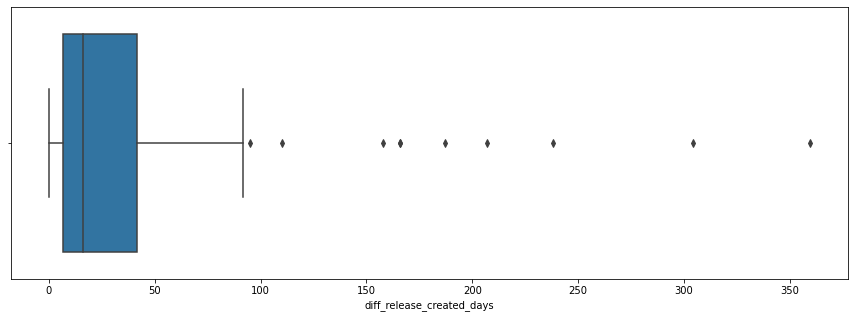

In [177]:
plt.figure()
sns_plot = sns.boxplot(x=pre_release.diff_release_created_days)
plt.savefig("output.png", transparent=True, bbox_inches='tight', pad_inches=0.2)

In [178]:
pre_release[pre_release.diff_release_created_days>100][focus_columns]

,issue_id,version_name,version_id,issue_key,issuetype,created,Date
14,90155,8.4,15833,SONAR-12692,Bug,2019-11-08 08:39:33,2020-07-03 07:09:27
438,61001,6.6,13961,SONAR-9239,Sub-task,2017-05-15 14:26:12,2017-10-20 12:09:25
663,61798,6.7.3,14264,SONAR-9384,Bug,2017-06-06 14:45:35,2018-04-06 14:12:21
719,39290,5.6,12869,SONAR-6622,Improvement,2015-06-08 05:18:41,2016-06-01 11:59:09
846,40455,5.2,11629,SONAR-6717,Improvement,2015-07-15 07:07:14,2015-11-02 08:56:19
847,30049,5.2,11629,SONAR-6569,Sub-task,2015-05-20 07:20:49,2015-11-02 08:56:19
848,30053,5.2,11629,SONAR-6568,Sub-task,2015-05-20 07:17:47,2015-11-02 08:56:19
849,29947,5.2,11629,SONAR-6512,Bug,2015-04-29 08:21:38,2015-11-02 08:56:19
850,29791,5.2,11629,SONAR-6407,Improvement,2015-04-09 08:50:02,2015-11-02 08:56:19


In [179]:
pre_release.issuetype.value_counts(normalize=True)

Bug              0.684564
Improvement      0.248322
Task             0.033557
Sub-task         0.026846
Documentation    0.006711
Name: issuetype, dtype: float64